# ***Comparativa de los resultados de testeo de los modelos***

In [120]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
import shutil
from utilities import *

In [121]:
import os

# Cambiar la ruta
BASE_PATH = "/Users/matias/Downloads/PROYECTO_FINAL_VA"

In [122]:
os.chdir(BASE_PATH+"/compare_model_metrics")

In [123]:
import yaml

def modificar_rutas_yaml(archivo_yaml, nueva_ruta_base, marcador="compare_model"):
    """
    Modifica las rutas en un archivo YAML cambiando todo antes del marcador con una nueva ruta base.

    :param archivo_yaml: Ruta del archivo YAML a modificar.
    :param nueva_ruta_base: Nueva ruta base que reemplazará el contenido antes del marcador.
    :param marcador: Texto que marca el inicio de la parte de la ruta que no debe ser modificada.
    """
    # Leer el archivo YAML
    with open(archivo_yaml, "r") as file:
        data = yaml.safe_load(file)

    # Claves con rutas que necesitan ser modificadas
    claves_rutas = ["train", "val", "test"]

    # Actualizar las rutas en el YAML
    for clave in claves_rutas:
        if clave in data:
            ruta_actual = data[clave]
            # Buscar la posición del marcador en la ruta
            marcador_idx = ruta_actual.find(marcador)
            if marcador_idx != -1:
                # Reemplazar la parte antes del marcador con la nueva ruta base
                parte_relativa = ruta_actual[marcador_idx:]  # Obtener la parte después del marcador
                data[clave] = f"{nueva_ruta_base}/{parte_relativa}"
            else:
                print(f"Advertencia: No se encontró el marcador '{marcador}' en la ruta '{ruta_actual}'.")

    # Escribir las modificaciones al archivo YAML
    with open(archivo_yaml, "w") as file:
        yaml.safe_dump(data, file, default_flow_style=False)
# Ejemplo de uso
file_yaml_GST = "yolov11_GST/model/yolov11_GST.yaml" 
file_yaml_HST = "yolov11_HST/model/yolov11_HST.yaml"
file_yaml_RGB = "yolov11_RGB/model/yolov11_RGB.yaml"
file_yaml_RGB_therm = "yolov11_RGB_THERM/model/yolov11_RGB_THERM.yaml"
file_yaml_therm = "yolov11_THERM/model/yolov11_THERM.yaml"

modificar_rutas_yaml(file_yaml_GST, BASE_PATH)
modificar_rutas_yaml(file_yaml_HST, BASE_PATH)
modificar_rutas_yaml(file_yaml_RGB, BASE_PATH)
modificar_rutas_yaml(file_yaml_RGB_therm, BASE_PATH)
modificar_rutas_yaml(file_yaml_therm, BASE_PATH)

In [124]:
import seaborn as sns

def plot_confusion(matrix, save_path, color="YlGn"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap=color, cbar=True, 
            xticklabels=["Cow", "Deer", "Horse", "Background"], 
            yticklabels=["Cow", "Deer", "Horse", "Background"], 
            annot_kws={"size": 16})  # Cambia el tamaño de los números

    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close()  #

## **Testeo de cada testeo**

### ***Modelo entrenado con imagenes RGB*** 

In [125]:
RGB_model = YOLO("yolov11_RGB/model/yolov11_RGB.pt")
RGB_results = RGB_model.val(data="yolov11_RGB/model/yolov11_RGB.yaml", split="test")


Ultralytics 8.3.36 🚀 Python-3.11.10 torch-2.2.2 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_RGB/test/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]


                   all         18         62      0.865      0.827      0.859      0.503
                   cow          9         37      0.776       0.73      0.848      0.436
                  deer          5         12      0.856       0.75      0.734      0.299
                 horse          4         13      0.962          1      0.995      0.774
Speed: 2.5ms preprocess, 405.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val52


### ***Modelo entrenado con imagenes termales*** 

In [126]:
THERM_model = YOLO("yolov11_THERM/model/yolov11_THERM.pt")
THERM_results = THERM_model.val(data="yolov11_THERM/model/yolov11_THERM.yaml", split="test")

Ultralytics 8.3.36 🚀 Python-3.11.10 torch-2.2.2 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_THERM/test/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]


                   all         18         66      0.969      0.963      0.977      0.557
                   cow          9         41      0.948      0.888      0.941      0.601
                  deer          5         12      0.965          1      0.995      0.574
                 horse          4         13      0.994          1      0.995      0.496
Speed: 1.7ms preprocess, 411.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val53


### ***Modelo entrenado con imagenes RGB y termales*** 

In [127]:
RGB_THERM_model = YOLO("yolov11_RGB_THERM/model/yolov11_RGB_THERM.pt")
RGB_THERM_results = RGB_THERM_model.val(data="yolov11_RGB_THERM/model/yolov11_RGB_THERM.yaml", split="test")

Ultralytics 8.3.36 🚀 Python-3.11.10 torch-2.2.2 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_RGB_THERM/test/labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 2346.21it/s]

val: New cache created: /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_RGB_THERM/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


                   all         36        124      0.963      0.932       0.96      0.537
                   cow         18         74       0.89      0.811       0.89      0.496
                  deer         10         24          1      0.984      0.995      0.514
                 horse          8         26      0.998          1      0.995      0.602
Speed: 1.2ms preprocess, 425.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val54


### ***Modelo entrenado con imagenes HST***

In [128]:
HST_model = YOLO("yolov11_HST/model/yolov11_HST.pt")
HST_results = HST_model.val(data="yolov11_HST/model/yolov11_HST.yaml", split="test")

Ultralytics 8.3.36 🚀 Python-3.11.10 torch-2.2.2 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_HST/test/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 2161.95it/s]

val: New cache created: /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_HST/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]


                   all         18         62       0.98      0.907      0.963      0.602
                   cow          9         37      0.964      0.722        0.9      0.542
                  deer          5         12      0.998          1      0.995       0.58
                 horse          4         13      0.978          1      0.995      0.684
Speed: 1.4ms preprocess, 409.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val55


### ***Modelo entrenado con imagenes GST***

In [129]:
GST_model = YOLO("yolov11_GST/model/yolov11_GST.pt")
GST_results = GST_model.val(data="yolov11_GST/model/yolov11_GST.yaml", split="test")

Ultralytics 8.3.36 🚀 Python-3.11.10 torch-2.2.2 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_GST/test/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 1701.31it/s]

val: New cache created: /Users/matias/Downloads/PROYECTO_FINAL_VA/compare_model_metrics/yolov11_GST/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.23s/it]


                   all         18         62      0.953       0.91      0.974      0.614
                   cow          9         37      0.957       0.73      0.938      0.543
                  deer          5         12       0.92          1      0.989      0.589
                 horse          4         13      0.981          1      0.995      0.709
Speed: 2.2ms preprocess, 454.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /opt/homebrew/runs/detect/val56


## **Resultados de testeo**

### ***Detecciones correctas de cada modelo***

In [130]:
RGB_img_detection = cv2.cvtColor(cv2.imread("yolov11_RGB/detection_example/RGB_detection.jpg"), cv2.COLOR_BGR2RGB)
THERM_img_detection = cv2.cvtColor(cv2.imread("yolov11_THERM/detection_example/THERM_detection.jpg"), cv2.COLOR_BGR2RGB)
HST_img_detection = cv2.cvtColor(cv2.imread("yolov11_HST/detection_example/HST_detection.jpg"), cv2.COLOR_BGR2RGB)
GST_img_detection = cv2.cvtColor(cv2.imread("yolov11_GST/detection_example/GST_detection.jpg"), cv2.COLOR_BGR2RGB)
RGB_THERM_img_detection_rgb = cv2.cvtColor(cv2.imread("yolov11_RGB_THERM/detection_example/RGB_THERM_detection_rgb.jpg"), cv2.COLOR_BGR2RGB)
RGB_THERM_img_detection_therm = cv2.cvtColor(cv2.imread("yolov11_RGB_THERM/detection_example/RGB_THERM_detection_therm.jpg"), cv2.COLOR_BGR2RGB)

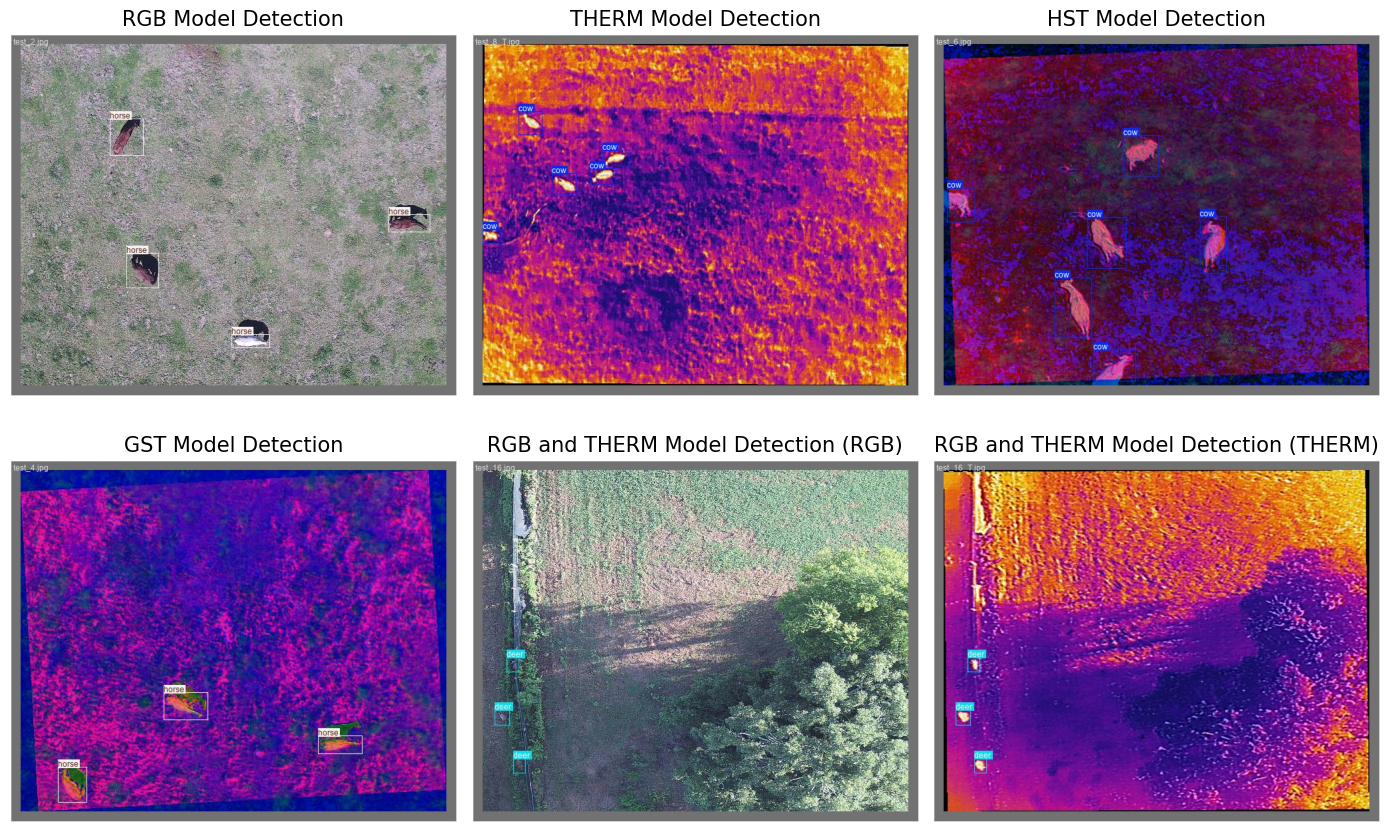

In [131]:
show_imgs_in_RGB([RGB_img_detection, THERM_img_detection, HST_img_detection, GST_img_detection, RGB_THERM_img_detection_rgb, RGB_THERM_img_detection_therm], cols=3, size=(14, 9), img_names=["RGB Model Detection", "THERM Model Detection", "HST Model Detection", "GST Model Detection", "RGB and THERM Model Detection (RGB)", "RGB and THERM Model Detection (THERM)"], name_size=15, save = True)

### ***Matriz de confusion de cada modelo***

### RGB matriz confusión

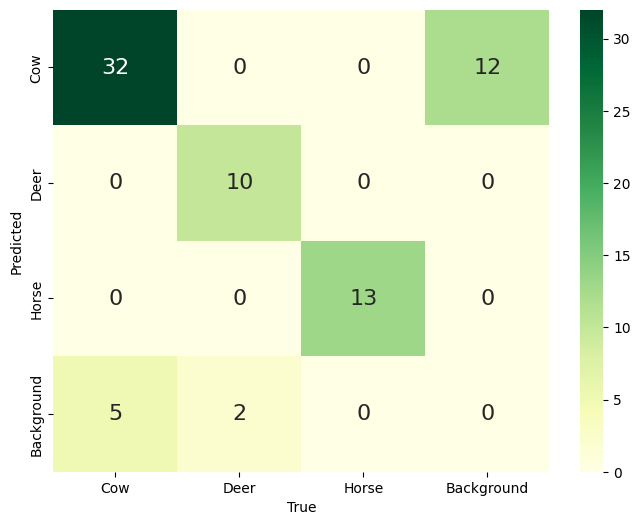

In [132]:
matrix = RGB_results.confusion_matrix.matrix
plot_confusion(matrix, save_path="yolov11_RGB/confusion_matrix/RGB_confusion_matrix.pdf")

### Thermal matriz de confusión

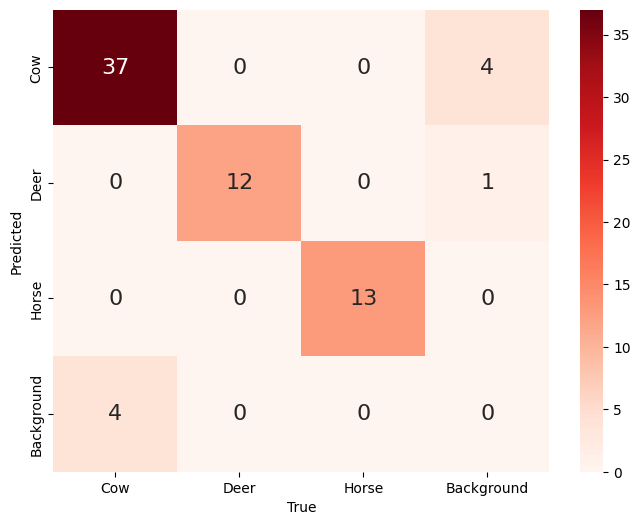

In [133]:
matrix = THERM_results.confusion_matrix.matrix
plot_confusion(matrix, save_path="yolov11_THERM/confusion_matrix/THERMAL_confusion.pdf", color="Reds")

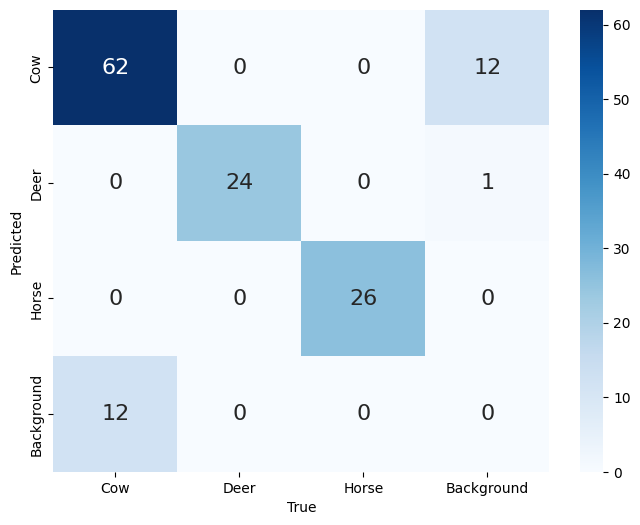

In [134]:
matrix = RGB_THERM_results.confusion_matrix.matrix
plot_confusion(matrix, save_path="yolov11_RGB_THERM/confusion_matrix/RGB_THERMAL_confusion.pdf",color="Blues")

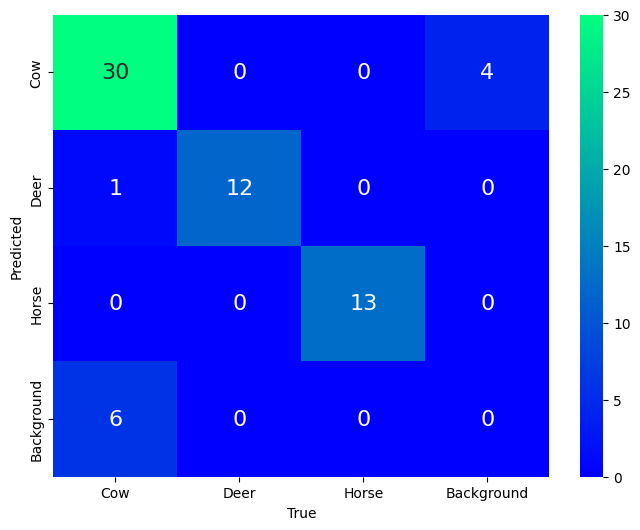

In [135]:
matrix = HST_results.confusion_matrix.matrix
plot_confusion(matrix, save_path="yolov11_HST/confusion_matrix/HST_confusion.pdf",color="winter")

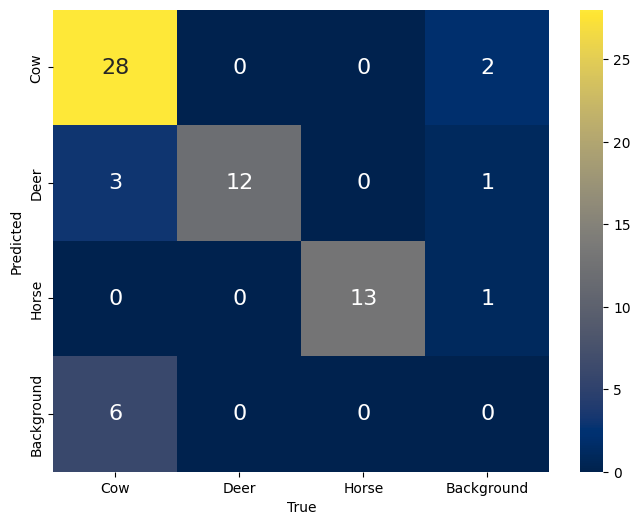

In [136]:
matrix = GST_results.confusion_matrix.matrix
plot_confusion(matrix, save_path="yolov11_GST/confusion_matrix/GST_confusion.pdf",color="cividis")

### ***Precision, recall y f1-score de cada modelo***

In [137]:
RGB_precision = RGB_results.results_dict["metrics/precision(B)"]
RGB_recall = RGB_results.results_dict["metrics/recall(B)"]
RGB_F1_score = F1_score(RGB_precision, RGB_recall)
RGB_mAP50 = RGB_results.results_dict["metrics/mAP50(B)"]
RGB_mAP50_95 = RGB_results.results_dict["metrics/mAP50-95(B)"]
RGB_fitness = RGB_results.results_dict["fitness"]
RGB_preprocess = RGB_results.speed["preprocess"]
RGB_inference = RGB_results.speed["inference"]
RGB_loss = RGB_results.speed["loss"]
RGB_postprocess = RGB_results.speed["postprocess"]

In [138]:
THERM_precision = THERM_results.results_dict["metrics/precision(B)"]
THERM_recall = THERM_results.results_dict["metrics/recall(B)"]
THERM_F1_score = F1_score(THERM_precision, THERM_recall)
THERM_mAP50 = THERM_results.results_dict["metrics/mAP50(B)"]
THERM_mAP50_95 = THERM_results.results_dict["metrics/mAP50-95(B)"]
THERM_fitness = THERM_results.results_dict["fitness"]
THERM_preprocess = THERM_results.speed["preprocess"]
THERM_inference = THERM_results.speed["inference"]
THERM_loss = THERM_results.speed["loss"]
THERM_postprocess = THERM_results.speed["postprocess"]

In [139]:
RGB_THERM_precision = RGB_THERM_results.results_dict["metrics/precision(B)"]
RGB_THERM_recall = RGB_THERM_results.results_dict["metrics/recall(B)"]
RGB_THERM_F1_score = F1_score(RGB_THERM_precision, RGB_THERM_recall)
RGB_THERM_mAP50 = RGB_THERM_results.results_dict["metrics/mAP50(B)"]
RGB_THERM_mAP50_95 = RGB_THERM_results.results_dict["metrics/mAP50-95(B)"]
RGB_THERM_fitness = RGB_THERM_results.results_dict["fitness"]
RGB_THERM_preprocess = RGB_THERM_results.speed["preprocess"]
RGB_THERM_inference = RGB_THERM_results.speed["inference"]
RGB_THERM_loss = RGB_THERM_results.speed["loss"]
RGB_THERM_postprocess = RGB_THERM_results.speed["postprocess"]

In [140]:
HST_precision = HST_results.results_dict["metrics/precision(B)"]
HST_recall = HST_results.results_dict["metrics/recall(B)"]
HST_F1_score = F1_score(HST_precision, HST_recall)
HST_mAP50 = HST_results.results_dict["metrics/mAP50(B)"]
HST_mAP50_95 = HST_results.results_dict["metrics/mAP50-95(B)"]
HST_fitness = HST_results.results_dict["fitness"]
HST_preprocess = HST_results.speed["preprocess"]
HST_inference = HST_results.speed["inference"]
HST_loss = HST_results.speed["loss"]
HST_postprocess = HST_results.speed["postprocess"]

In [141]:
GST_precision = GST_results.results_dict["metrics/precision(B)"]
GST_recall = GST_results.results_dict["metrics/recall(B)"]
GST_F1_score = F1_score(GST_precision, GST_recall)
GST_mAP50 = GST_results.results_dict["metrics/mAP50(B)"]
GST_mAP50_95 = GST_results.results_dict["metrics/mAP50-95(B)"]
GST_fitness = GST_results.results_dict["fitness"]
GST_preprocess = GST_results.speed["preprocess"]
GST_inference = GST_results.speed["inference"]
GST_loss = GST_results.speed["loss"]
GST_postprocess = GST_results.speed["postprocess"]

In [142]:
# Obtenidos a partir de la información presente en la matrix de confusión
# (en el archivo main_late_fusion.ipynb)
late_fusion_precision = 0.919 # 
late_fusion_recall = 0.873
late_fusion_F1_score = F1_score(late_fusion_precision, late_fusion_recall)

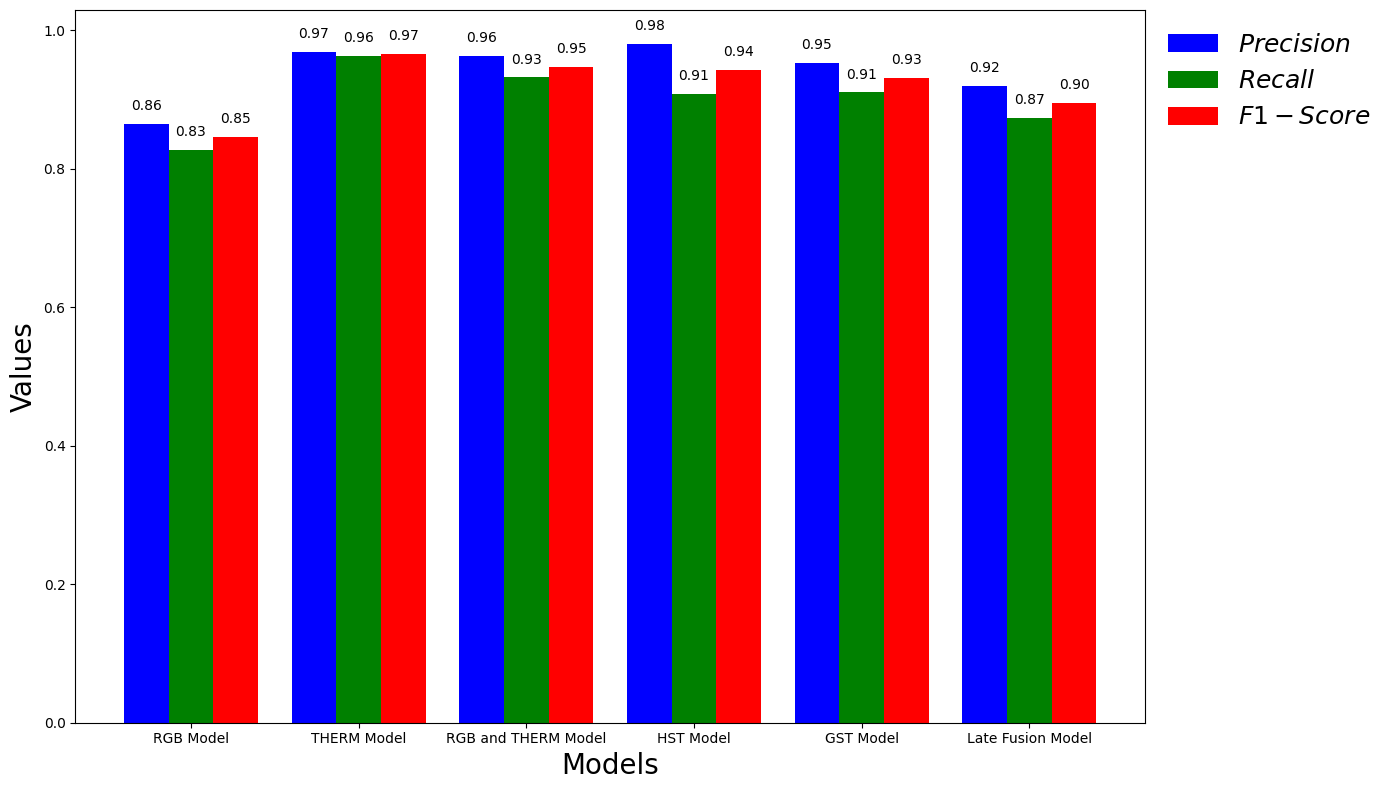

In [143]:
metrics_1 = {
    r"$Precision$": [RGB_precision, THERM_precision, RGB_THERM_precision, HST_precision, GST_precision, late_fusion_precision],
    r"$Recall$": [RGB_recall, THERM_recall, RGB_THERM_recall, HST_recall, GST_recall, late_fusion_recall],
    r"$F1-Score$": [RGB_F1_score, THERM_F1_score, RGB_THERM_F1_score, HST_F1_score, GST_F1_score, late_fusion_F1_score]
}

labels_1 = ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model", "Late Fusion Model"]

colors_1 = ["blue", "green", "red"]

plot_metrics(metrics_1, labels_1, colors_1, save = True, fontsize=20, ticksize=18, titlesize=30)

### ***mAP de cada modelo***

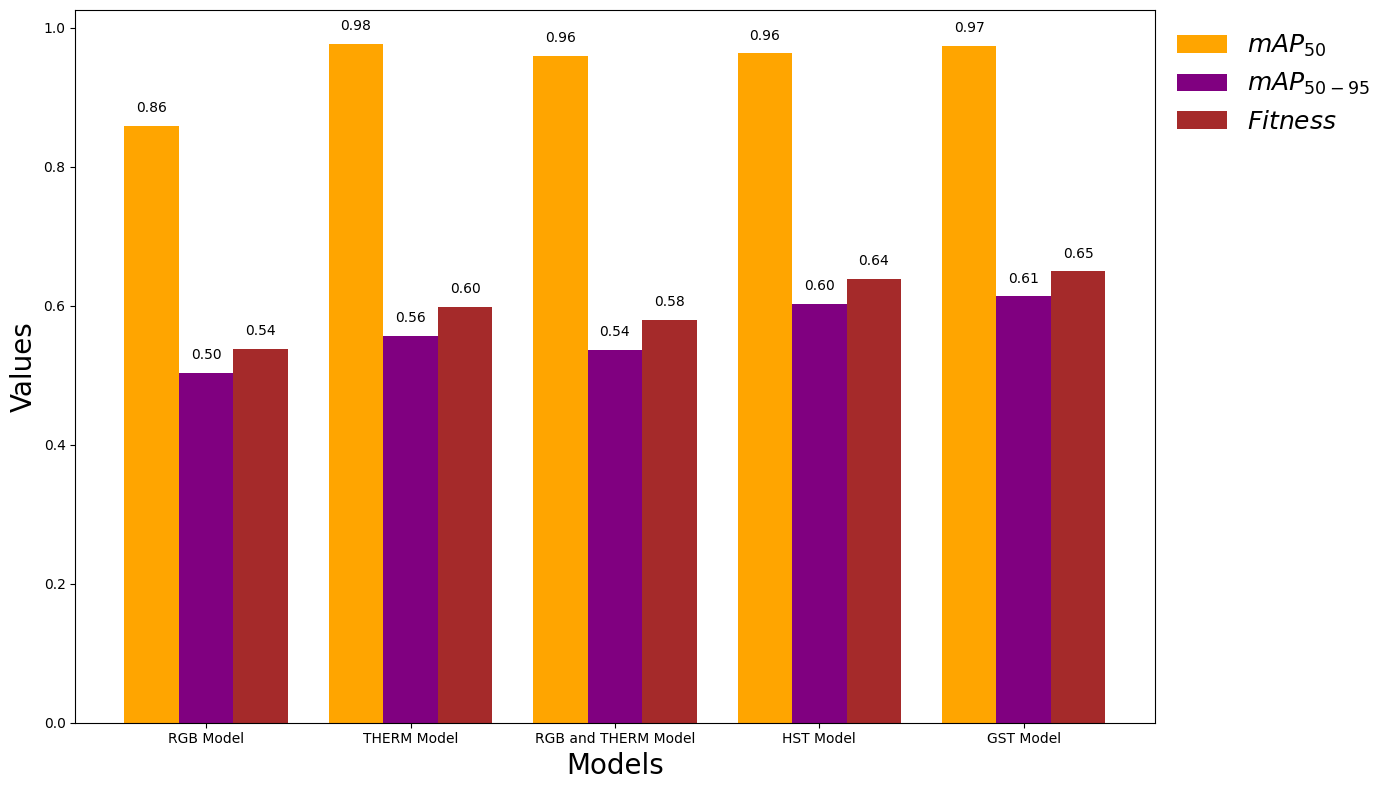

In [144]:
metrics_2 = {
    r"$mAP_{50}$": [RGB_mAP50, THERM_mAP50, RGB_THERM_mAP50, HST_mAP50, GST_mAP50],
    r"$mAP_{50-95}$": [RGB_mAP50_95, THERM_mAP50_95, RGB_THERM_mAP50_95, HST_mAP50_95, GST_mAP50_95],
    r"$Fitness$": [RGB_fitness, THERM_fitness, RGB_THERM_fitness, HST_fitness, GST_fitness],
}

labels_2 = ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model"]

colors_2 = ["orange", "purple", "brown"]

plot_metrics(metrics_2, labels_2, colors_2, fontsize=20, ticksize=18, titlesize=30)

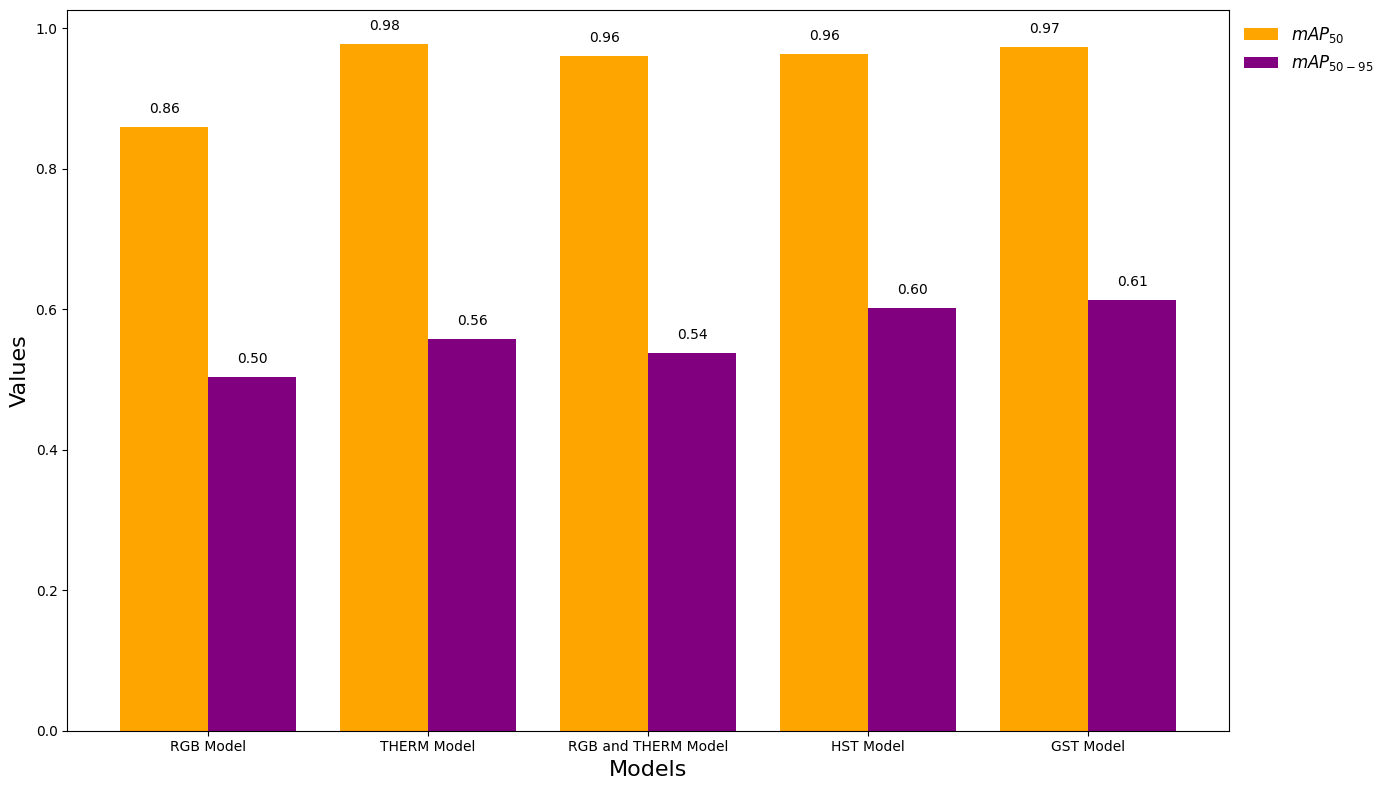

In [145]:
metrics_3 = {
    r"$mAP_{50}$": [RGB_mAP50, THERM_mAP50, RGB_THERM_mAP50, HST_mAP50, GST_mAP50],
    r"$mAP_{50-95}$": [RGB_mAP50_95, THERM_mAP50_95, RGB_THERM_mAP50_95, HST_mAP50_95, GST_mAP50_95],
}

labels_3 = ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model"]

colors_3 = ["orange", "purple"]

plot_metrics(metrics_3, labels_3, colors_3, save = True)

### ***Curva Recall-Confidence de cada modelo (promedio)***

In [146]:
RGB_confidence_classes = RGB_results.curves_results[3][0]
RGB_recall_mean_classes = metrics_averaging([RGB_results.curves_results[3][1][0], RGB_results.curves_results[3][1][1], RGB_results.curves_results[3][1][2]])

In [147]:
THERM_confidence_classes = THERM_results.curves_results[3][0]
THERM_recall_mean_classes = metrics_averaging([THERM_results.curves_results[3][1][0], THERM_results.curves_results[3][1][1], THERM_results.curves_results[3][1][2]])

In [148]:
RGB_THERM_confidence_classes = RGB_THERM_results.curves_results[3][0]
RGB_THERM_recall_mean_classes = metrics_averaging([RGB_THERM_results.curves_results[3][1][0], RGB_THERM_results.curves_results[3][1][1], RGB_THERM_results.curves_results[3][1][2]])

In [149]:
HST_confidence_classes = HST_results.curves_results[3][0]
HST_recall_mean_classes = metrics_averaging([HST_results.curves_results[3][1][0], HST_results.curves_results[3][1][1], HST_results.curves_results[3][1][2]])

In [150]:
GST_confidence_classes = GST_results.curves_results[3][0]
GST_recall_mean_classes = metrics_averaging([GST_results.curves_results[3][1][0], GST_results.curves_results[3][1][1], GST_results.curves_results[3][1][2]])


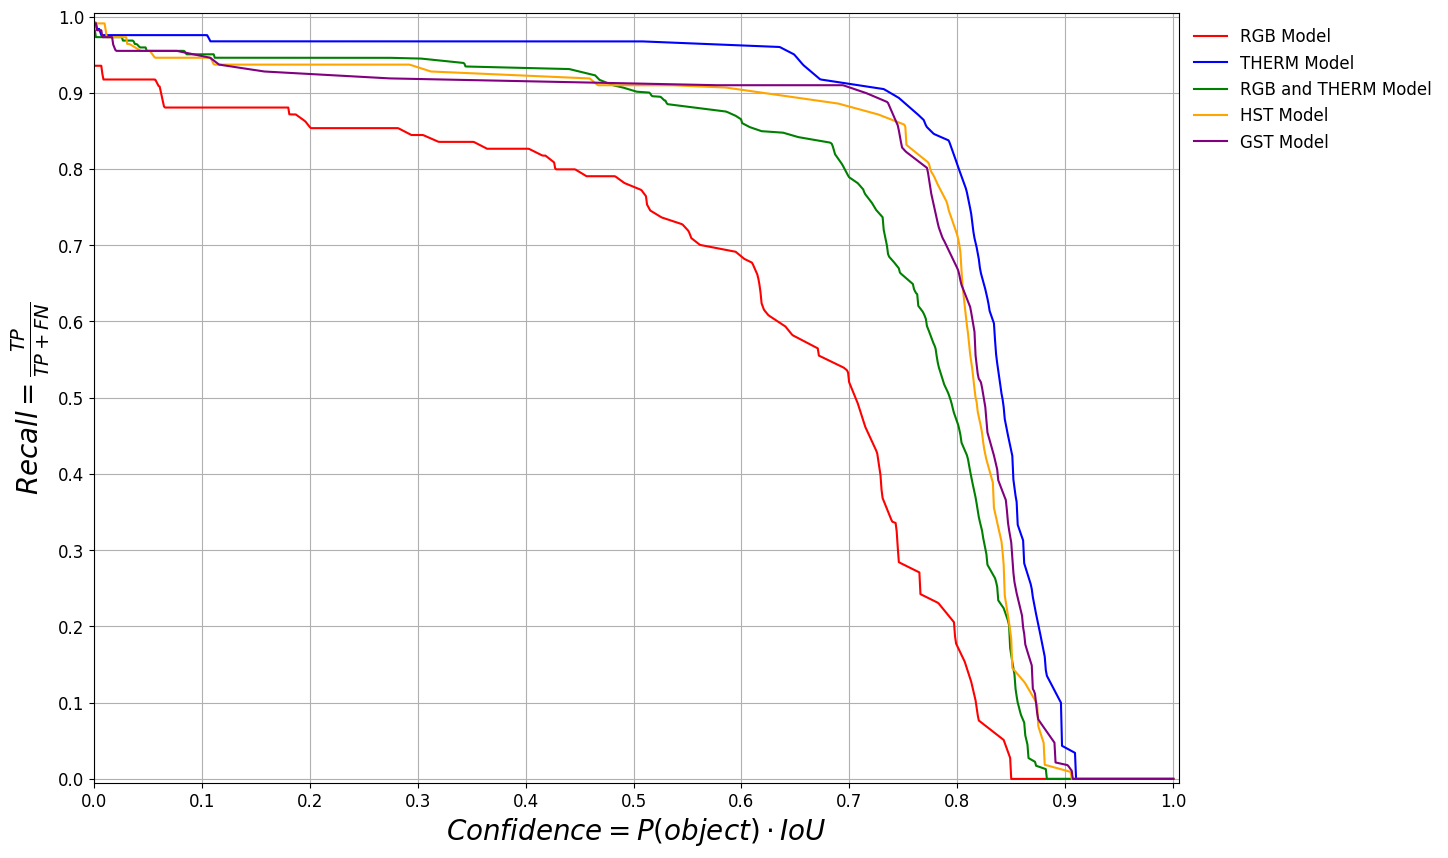

In [151]:
recall_confidence_curve([RGB_confidence_classes, THERM_confidence_classes, RGB_THERM_confidence_classes, HST_confidence_classes, GST_confidence_classes], [RGB_recall_mean_classes, THERM_recall_mean_classes, RGB_THERM_recall_mean_classes, HST_recall_mean_classes, GST_recall_mean_classes], ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model"], ["red", "blue", "green", "orange", "purple"], save=True)

### ***Curva F1-Score-Confidence de cada modelo (promedio)***

In [152]:
RGB_confidence_classes = RGB_results.curves_results[1][0]
RGB_f1_score_mean_classes = metrics_averaging([RGB_results.curves_results[1][1][0], RGB_results.curves_results[1][1][1], RGB_results.curves_results[1][1][2]])

In [153]:
THERM_confidence_classes = THERM_results.curves_results[1][0]
THERM_f1_score_mean_classes = metrics_averaging([THERM_results.curves_results[1][1][0], THERM_results.curves_results[1][1][1], THERM_results.curves_results[1][1][2]])

In [154]:
THERM_confidence_classes = THERM_results.curves_results[1][0]
THERM_f1_score_mean_classes = metrics_averaging([THERM_results.curves_results[1][1][0], THERM_results.curves_results[1][1][1], THERM_results.curves_results[1][1][2]])

In [155]:
RGB_THERM_confidence_classes = RGB_THERM_results.curves_results[1][0]
RGB_THERM_f1_score_mean_classes = metrics_averaging([RGB_THERM_results.curves_results[1][1][0], RGB_THERM_results.curves_results[1][1][1], RGB_THERM_results.curves_results[1][1][2]])

In [156]:
HST_confidence_classes = HST_results.curves_results[1][0]
HST_f1_score_mean_classes = metrics_averaging([HST_results.curves_results[1][1][0], HST_results.curves_results[1][1][1], HST_results.curves_results[1][1][2]])

In [157]:
GST_confidence_classes = GST_results.curves_results[1][0]
GST_f1_score_mean_classes = metrics_averaging([GST_results.curves_results[1][1][0], GST_results.curves_results[1][1][1], GST_results.curves_results[1][1][2]])

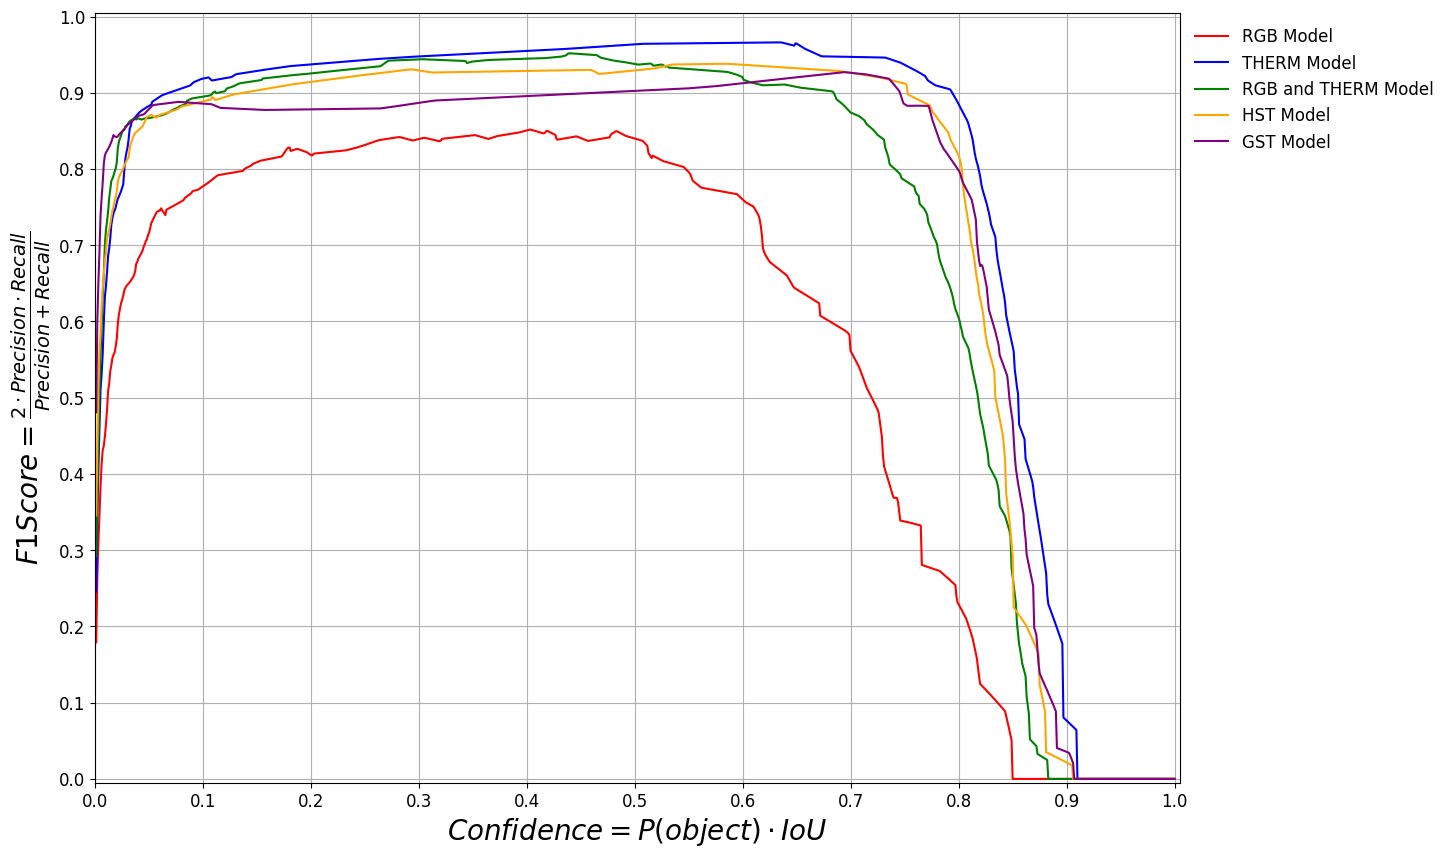

In [158]:
F1_confidence_curve([RGB_confidence_classes, THERM_confidence_classes, RGB_THERM_confidence_classes, HST_confidence_classes, GST_confidence_classes], [RGB_f1_score_mean_classes, THERM_f1_score_mean_classes, RGB_THERM_f1_score_mean_classes, HST_f1_score_mean_classes, GST_f1_score_mean_classes], ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model"], ["red", "blue", "green", "orange", "purple"], save=True)

### ***Curva Precision-Confidence de cada modelo (promedio)***

In [159]:
RGB_confidence_classes = RGB_results.curves_results[2][0]
RGB_precision_mean_classes = metrics_averaging([RGB_results.curves_results[2][1][0], RGB_results.curves_results[2][1][1], RGB_results.curves_results[2][1][2]])

In [160]:
THERM_confidence_classes = THERM_results.curves_results[2][0]
THERM_precision_mean_classes = metrics_averaging([THERM_results.curves_results[2][1][0], THERM_results.curves_results[2][1][1], THERM_results.curves_results[2][1][2]])

In [161]:
RGB_THERM_confidence_classes = RGB_THERM_results.curves_results[2][0]
RGB_THERM_precision_mean_classes = metrics_averaging([RGB_THERM_results.curves_results[2][1][0], RGB_THERM_results.curves_results[2][1][1], RGB_THERM_results.curves_results[2][1][2]])

In [162]:
HST_confidence_classes = HST_results.curves_results[2][0]
HST_precision_mean_classes = metrics_averaging([HST_results.curves_results[2][1][0], HST_results.curves_results[2][1][1], HST_results.curves_results[2][1][2]])

In [163]:
GST_confidence_classes = GST_results.curves_results[2][0]
GST_precision_mean_classes = metrics_averaging([GST_results.curves_results[2][1][0], GST_results.curves_results[2][1][1], GST_results.curves_results[2][1][2]])

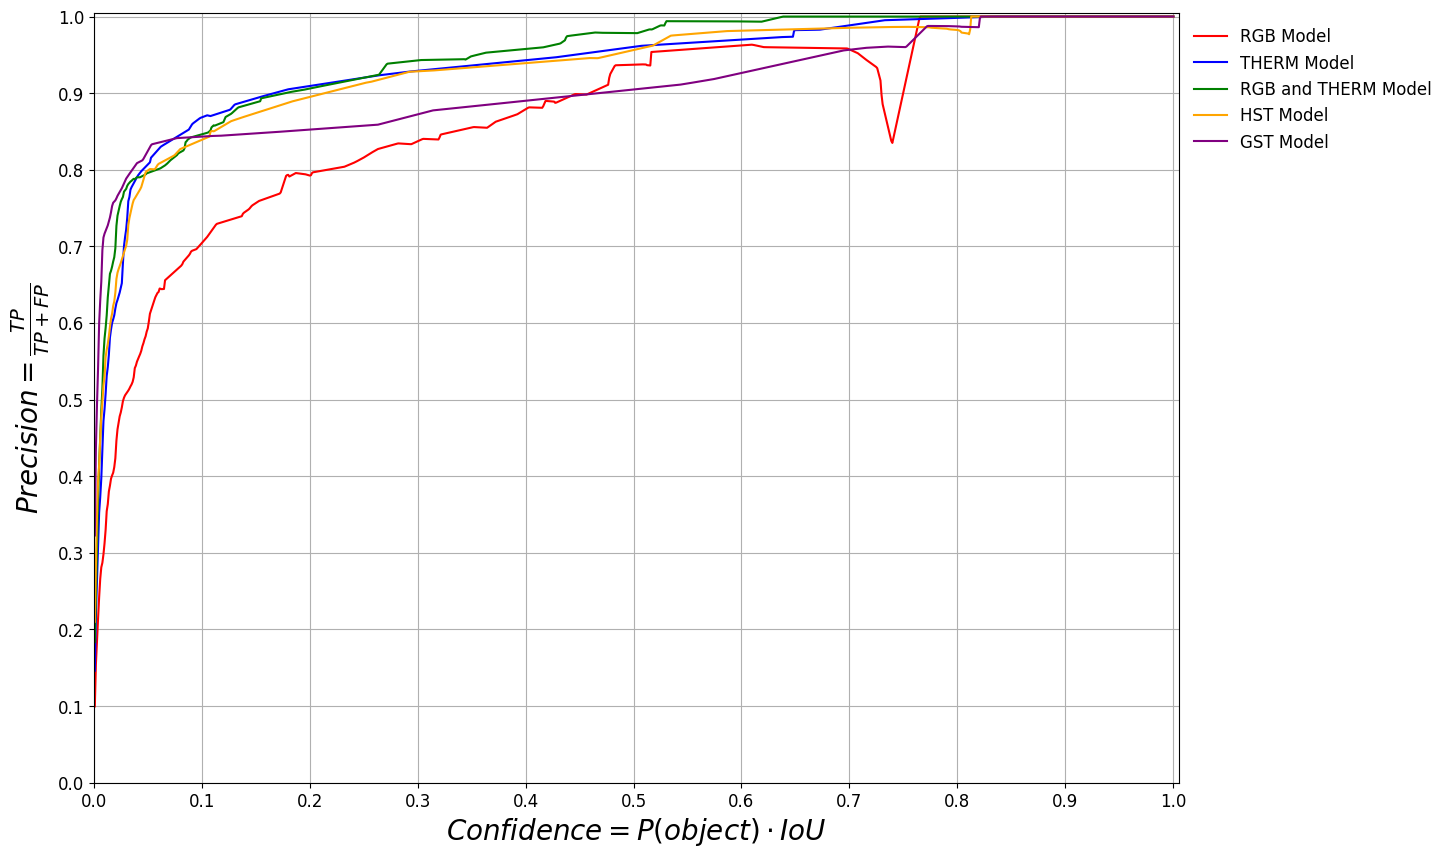

In [164]:
precision_confidence_curve([RGB_confidence_classes, THERM_confidence_classes, RGB_THERM_confidence_classes, HST_confidence_classes, GST_confidence_classes], [RGB_precision_mean_classes, THERM_precision_mean_classes, RGB_THERM_precision_mean_classes, HST_precision_mean_classes, GST_precision_mean_classes], ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model"], ["red", "blue", "green", "orange", "purple"], save=True)

### ***Curva Precision-Recall de cada modelo (promedio)***

In [165]:
RGB_recall_classes = RGB_results.curves_results[0][0]
RGB_precision_mean_classes_2 = metrics_averaging([RGB_results.curves_results[0][1][0], RGB_results.curves_results[0][1][1], RGB_results.curves_results[0][1][2]])

In [166]:
THERM_recall_classes = THERM_results.curves_results[0][0]
THERM_precision_mean_classes_2 = metrics_averaging([THERM_results.curves_results[0][1][0], THERM_results.curves_results[0][1][1], THERM_results.curves_results[0][1][2]])

In [167]:
RGB_THERM_recall_classes = RGB_THERM_results.curves_results[0][0]
RGB_THERM_precision_mean_classes_2 = metrics_averaging([RGB_THERM_results.curves_results[0][1][0], RGB_THERM_results.curves_results[0][1][1], RGB_THERM_results.curves_results[0][1][2]])

In [168]:
HST_recall_classes = HST_results.curves_results[0][0]
HST_precision_mean_classes_2 = metrics_averaging([HST_results.curves_results[0][1][0], HST_results.curves_results[0][1][1], HST_results.curves_results[0][1][2]])

In [169]:
GST_recall_classes = GST_results.curves_results[0][0]
GST_precision_mean_classes_2 = metrics_averaging([GST_results.curves_results[0][1][0], GST_results.curves_results[0][1][1], GST_results.curves_results[0][1][2]])

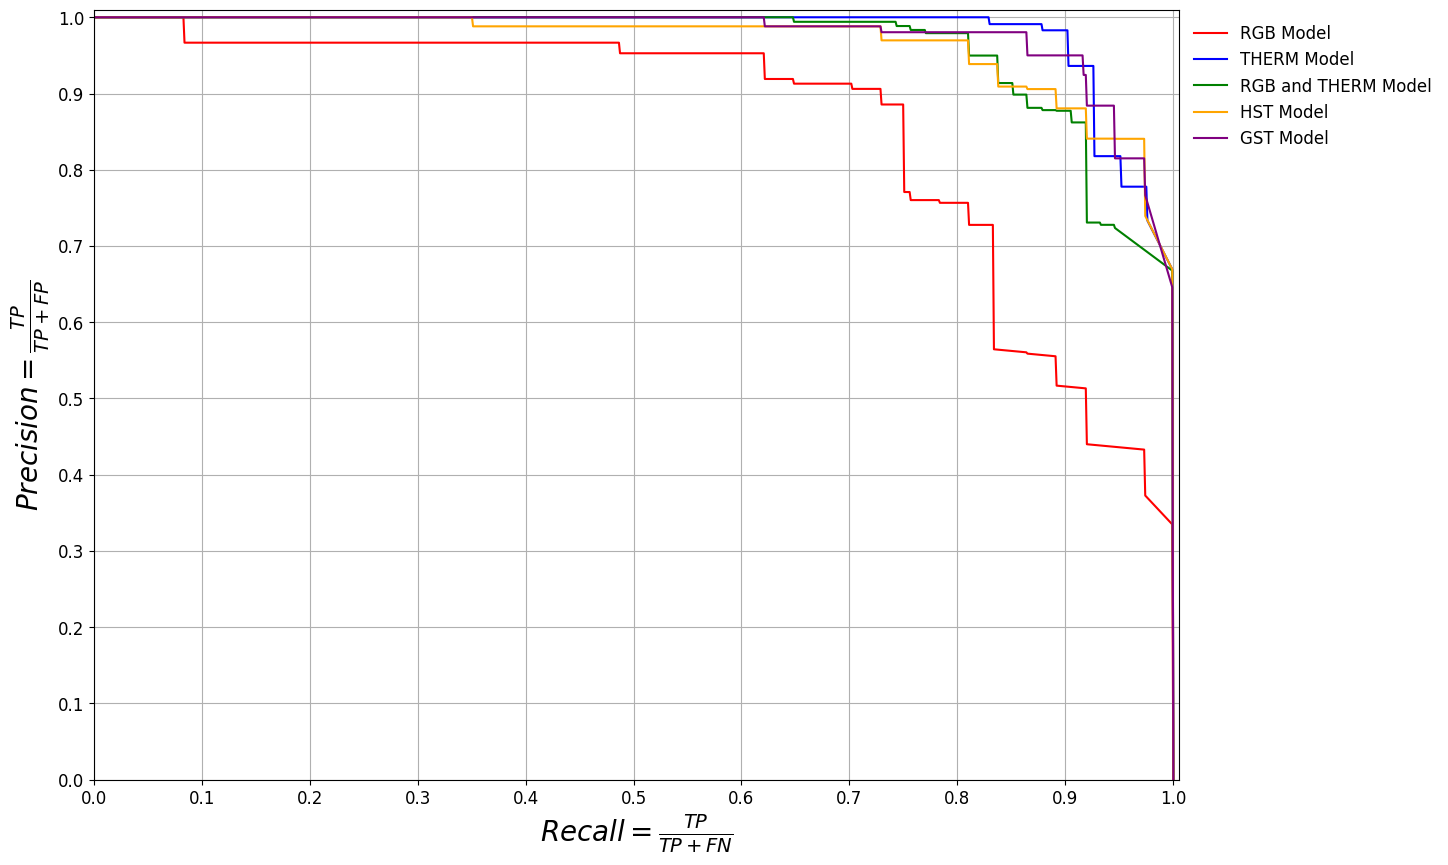

In [170]:
precision_recall_curve([RGB_recall_classes, THERM_recall_classes, RGB_THERM_recall_classes, HST_recall_classes, GST_recall_classes], [RGB_precision_mean_classes_2, THERM_precision_mean_classes_2, RGB_THERM_precision_mean_classes_2, HST_precision_mean_classes_2, GST_precision_mean_classes_2], ["RGB Model", "THERM Model", "RGB and THERM Model", "HST Model", "GST Model"], ["red", "blue", "green", "orange", "purple"], save=True)